In [1]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv("E:\\kareem\\book_3\\dr sdeq Advanced Machine Learning Books\\dr ahmed\\first project car cluster\\cars.csv")

In [6]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [7]:
X = dataset.iloc[:,:-1].values

X = pd.DataFrame(X)
#X = X.convert_objects(convert_numeric=True)
X = X._convert(numeric=True)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']

In [8]:
# Eliminating null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


In [9]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

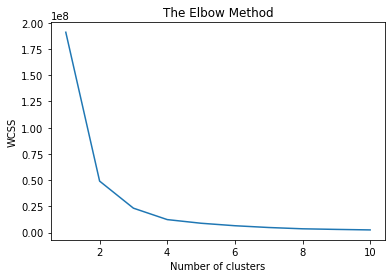

In [10]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.values

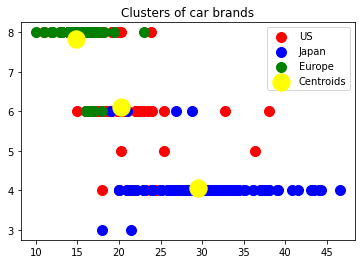

In [12]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()